In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

In [2]:
'''
You can easily write the python code, but for flexibility of later python coding, 
I show here how to define a function, called walk(steps), which is passed a single 
number steps and returns a vector of that length, which contains all the positions of 
the random walk.
'''

def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # initialise the array of integers
    x[0] = 0  # start at the origin
    for i in range(1, len(x)):  
        rnd = random()  # rnd selected from [0,1)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # steps right one unit 
        else:
            x[i] = x[i-1] - 1 # steps left one unit
    return x

In [3]:
'''
You can also use the vectorised version below.
'''

def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x

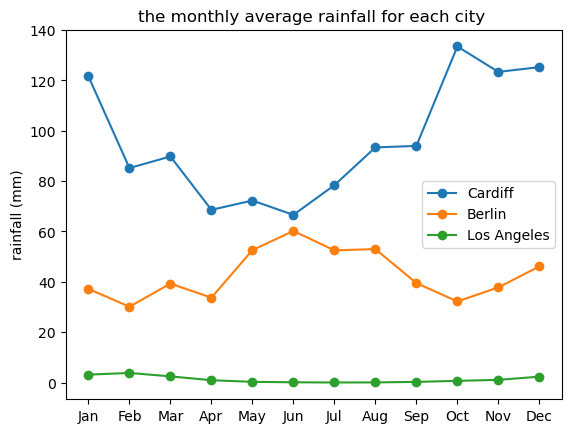

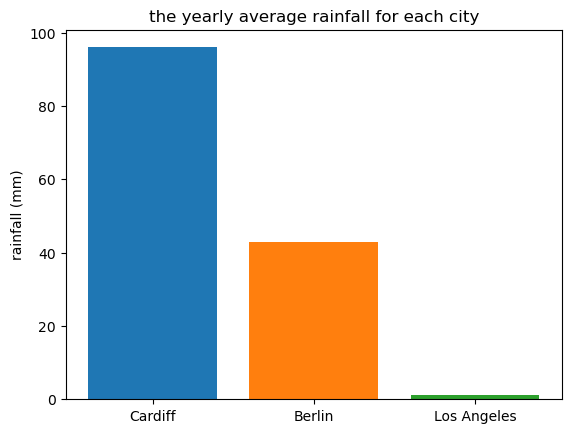

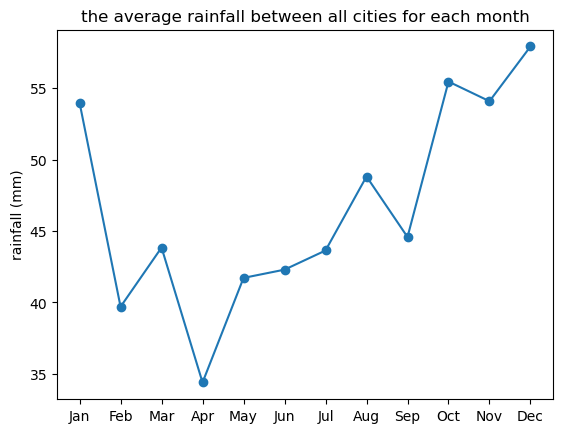

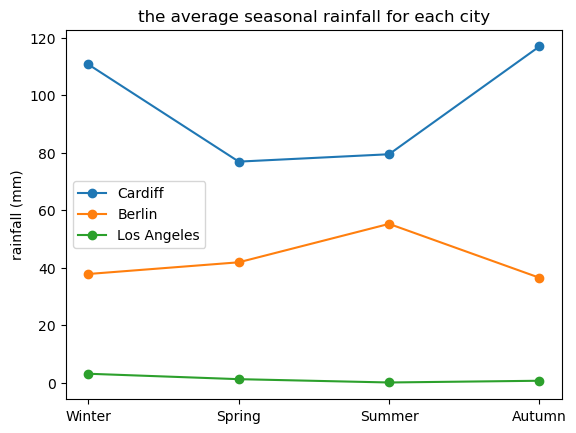

In [4]:
#exercise 0
! wget -q https://raw.githubusercontent.com/PX2134/extra/master/rain.txt
rain=np.loadtxt('rain.txt')

cities=['Cardiff', 'Berlin', 'Los Angeles']
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# the monthly average rainfall for each city
for i in range(3):
    plt.plot(months, rain[i,:], marker='o', label=cities[i])
plt.ylabel('rainfall (mm)')
plt.title('the monthly average rainfall for each city ')
plt.legend();

plt.figure();

# the yearly average rainfall for each city
for i in range(3):
    plt.bar(cities[i], np.average(rain[i,:]))
plt.ylabel('rainfall (mm)')
plt.title('the yearly average rainfall for each city');

plt.figure();

# the average rainfall between all cities for each month
average=np.zeros(12)
for i in range(12):
    average[i]=np.average(rain[:,i]) # all cities in i month
plt.plot(months, average, marker='o')
plt.ylabel('rainfall (mm)')
plt.title('the average rainfall between all cities for each month');
'''
can also do 
np.average(rain, axis=0)
'''

plt.figure();

# the seasonal rainfall for each city
seasons=['Winter', 'Spring', 'Summer', 'Autumn']
season_index=[
    [11,0,1], # dec, jan, feb
    [2,3,4], # mar, apr, may
    [5,6,7], # jun, jul, aug
    [8,9,10] # sep, oct, nov
]
for i in range(3):
    season_avg=[]
    for s in season_index:
        season_avg.append(np.average(rain[i,s]))
    plt.plot(seasons, season_avg, marker='o', label=cities[i])
plt.ylabel('rainfall (mm)')
plt.title('the average seasonal rainfall for each city')
plt.legend();

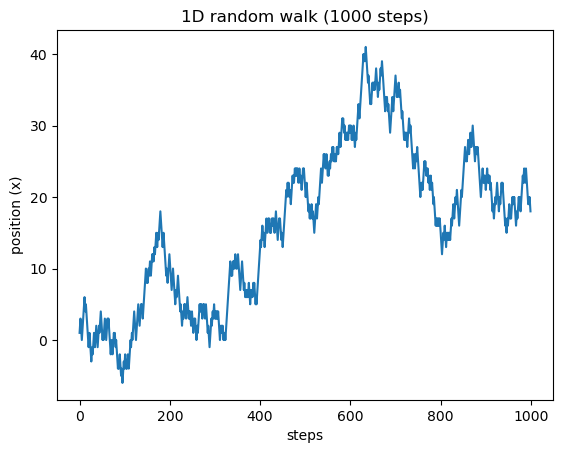

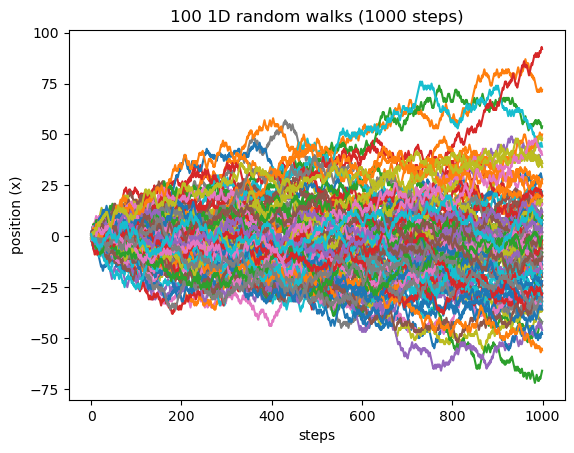

In [5]:
# exercise 1

# part 1
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x
    
steps=1000    
x=walk(steps)

plt.plot(range(steps), x)
plt.xlabel('steps')
plt.ylabel('position (x)')
plt.title('1D random walk (1000 steps)');

plt.figure()

#part 2

for i in range(100):
    x_repeat=walk(1000)
    plt.plot(range(1000), x_repeat)
plt.xlabel('steps')
plt.ylabel('position (x)')
plt.title('100 1D random walks (1000 steps)')
plt.show();

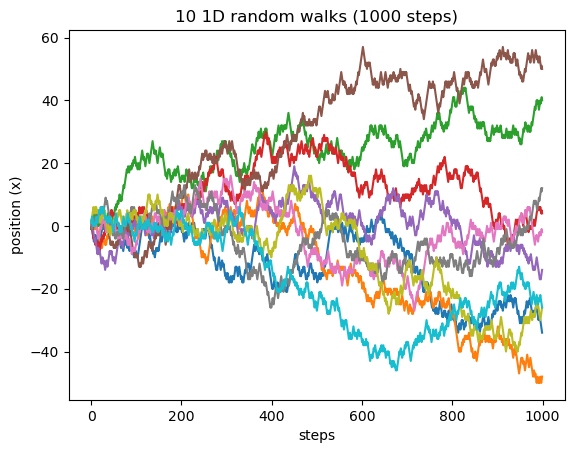

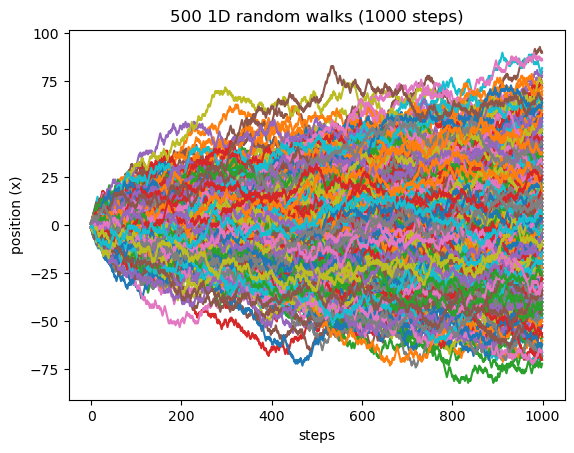

the mean position at the last step is 0.364
the mean squared position at the last step is 1032.44


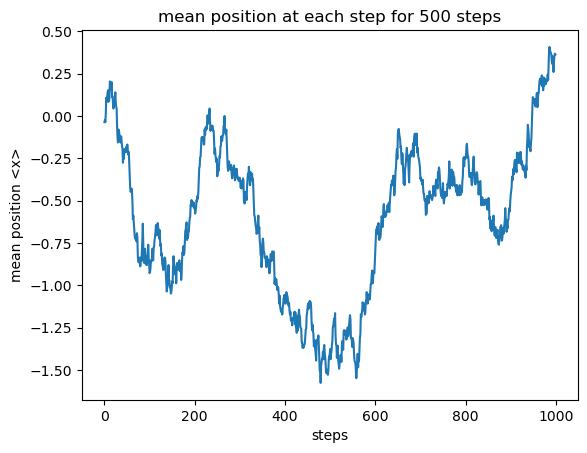

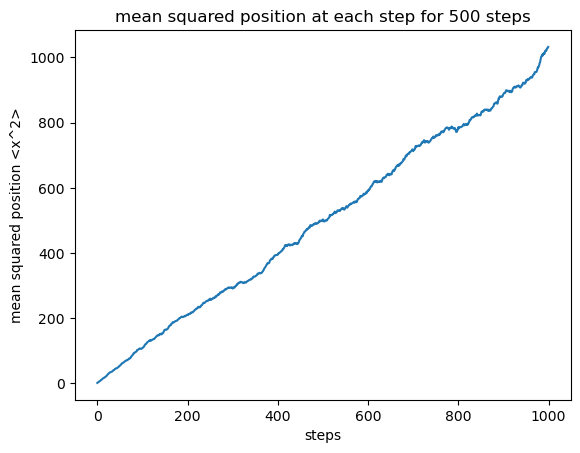

In [6]:
# exercise 2

# part 1
steps=1000
N=10
particles=np.zeros((steps,N), int)

for i in range(N):
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    particles[:,i] = np.cumsum(x) # cumulative sum
# plotting 10 walkers
for i in range(N):
    plt.plot(range(steps), particles[:,i])
plt.xlabel('steps')
plt.ylabel('position (x)')
plt.title('10 1D random walks (1000 steps)')
plt.show();

plt.figure();

# part 2
steps=1000
N=500
particles=np.zeros((steps,N), int)

for i in range(N):
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    particles[:,i] = np.cumsum(x) # cumulative sum
# plotting 500 walkers
for i in range(N):
    plt.plot(range(steps), particles[:,i])
plt.xlabel('steps')
plt.ylabel('position (x)')
plt.title('500 1D random walks (1000 steps)')
plt.show();

# mean position <x> and mean squared position <x^2>
mean_pos=np.average(particles, axis=1)
mean_sq_pos=np.average(particles**2, axis=1)

print(f"the mean position at the last step is {mean_pos[-1]}")
print(f"the mean squared position at the last step is {mean_sq_pos[-1]}")

plt.figure();

# part 3
# already got mean position at each step
plt.plot(range(steps), mean_pos)
plt.xlabel('steps')
plt.ylabel('mean position <x>')
plt.title('mean position at each step for 500 steps')
plt.show();

plt.figure();

# part 4
# already got mean squared position at each step
plt.plot(range(steps), mean_sq_pos)
plt.xlabel('steps')
plt.ylabel('mean squared position <x^2>')
plt.title('mean squared position at each step for 500 steps')
plt.show();

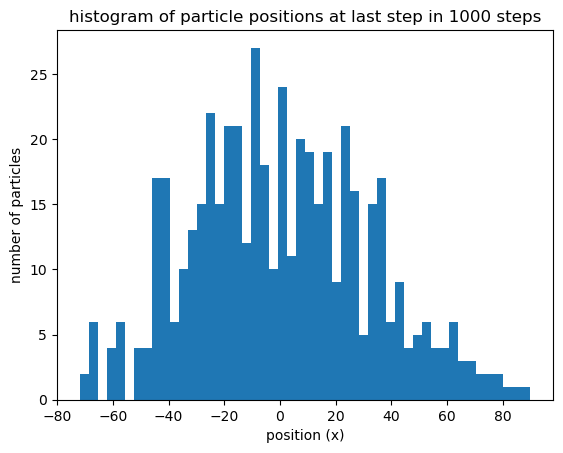

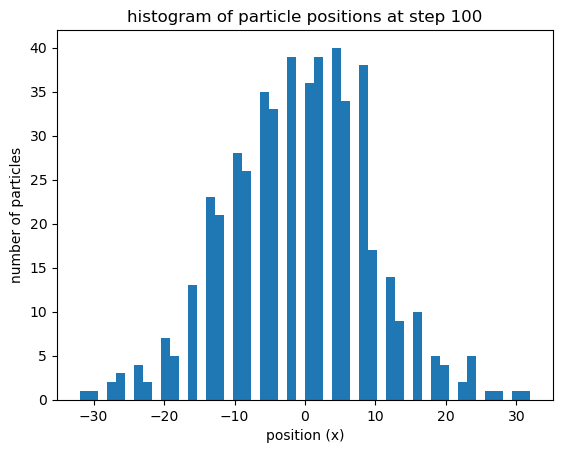

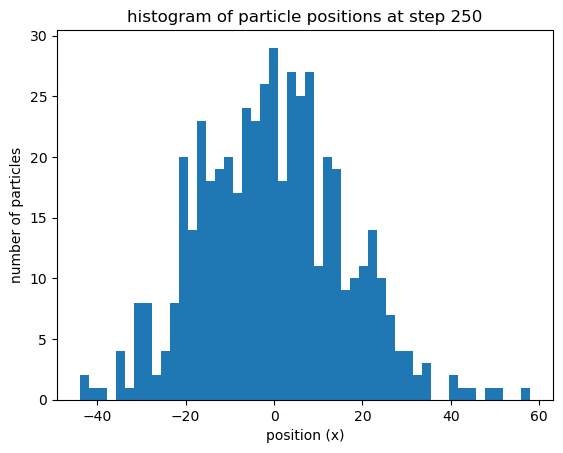

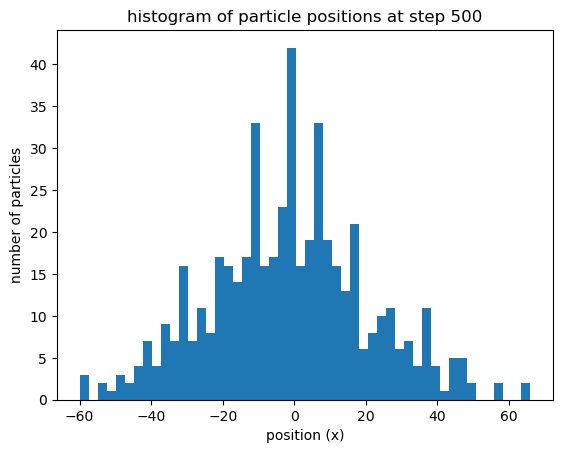

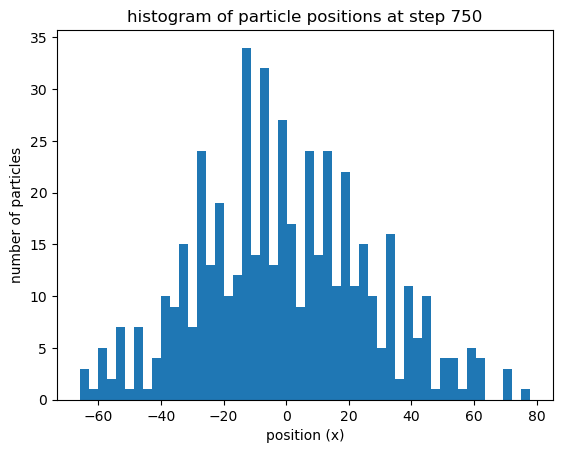

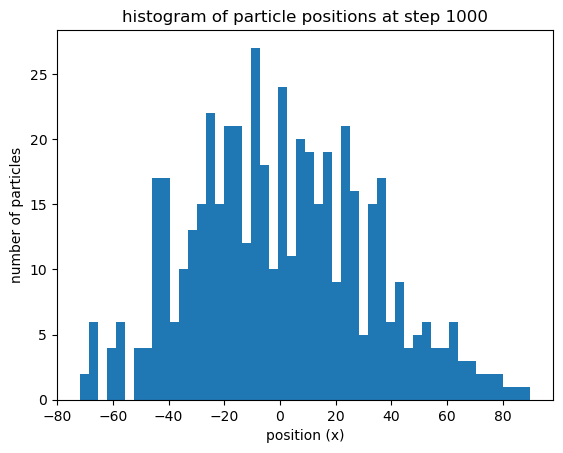

<Figure size 640x480 with 0 Axes>

In [7]:
# exercise 3

# part 1
final_positions=particles[-1,:]
plt.hist(final_positions, bins=50)
plt.xlabel('position (x)')
plt.ylabel('number of particles')
plt.title('histogram of particle positions at last step in 1000 steps')
plt.show();

plt.figure();

# part 2
intermediate_steps=[100, 250, 500, 750, 1000]

for step in intermediate_steps:
    plt.hist(particles[step-1,:], bins=50)
    plt.xlabel('position (x)')
    plt.ylabel('number of particles')
    plt.title(f"histogram of particle positions at step {step}")
    plt.savefig(f"hist_step_{step}.png")
    plt.show();
    plt.figure();